In [1]:
!pip install gensim pandas nltk

In [46]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel

cleaned_data = pd.read_csv('/content/Comments5000.csv')

tokenized_data = cleaned_data['Comment'].apply(lambda x: x.split()).tolist()  # tokenizing

# Prepare data for topic modeling
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Training the LDA model
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Assign each comment to its dominant topic
dominant_topics = []

for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]  # Get the index of the highest probability topic
    dominant_topics.append(dominant_topic)

# Count comments per topic
topic_counts = pd.Series(dominant_topics).value_counts()

# Calculate percentages
total_comments = len(dominant_topics)
topic_percentages = (topic_counts / total_comments) * 100

# Prepare the output DataFrame with topics, tokens, and percentages
output_rows = []

for idx in range(num_topics):
    # Get most relevant tokens for the topic
    topic_info = lda_model.get_topic_terms(idx, topn=6)
    tokens = ", ".join([dictionary[id] for id, _ in topic_info])
    overall_percentage = topic_percentages.get(idx, 0)

    output_rows.append({
        'Topic': f'Topic {idx + 1}',
        'Most Relevant Tokens': tokens,
        'Overall Percentage': f"{overall_percentage:.2f}%"
    })


output_df = pd.DataFrame(output_rows)
output_df.head(5)


,Topic,Most Relevant Tokens,Overall Percentage
0,Topic 1,"vehicle, air, use, car, pollution, india",8.88%
1,Topic 2,"hai, se, ki, ke, ko, ka",15.92%
2,Topic 3,"pollution, burning, delhi, diwali, punjab, stu...",13.02%
3,Topic 4,"video, question, sir, u, please, work",16.98%
4,Topic 5,"people, pollution, india, delhi, air, government",45.19%


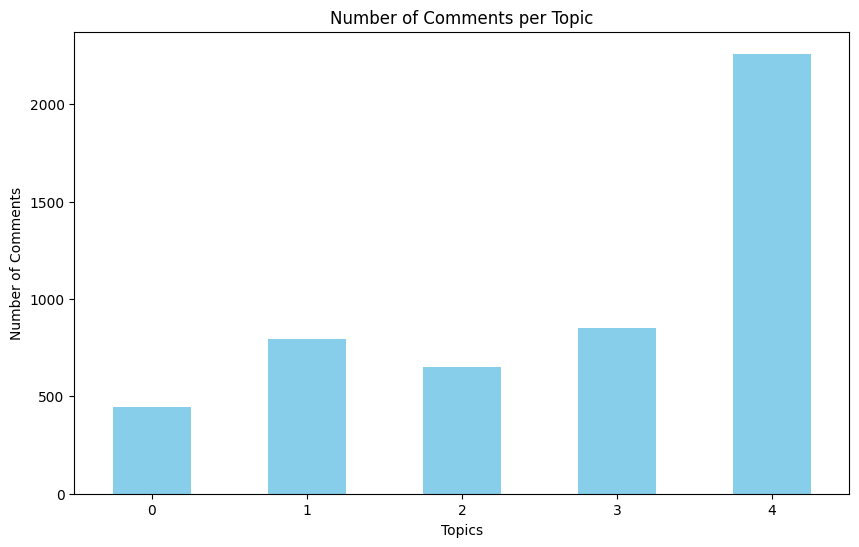

In [47]:
# Visualization of comments per topic
import matplotlib.pyplot as plt
topic_counts = topic_counts.reindex(range(num_topics), fill_value=0)
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Topics')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Topic')
plt.xticks(rotation=0)
plt.show()


   Number of Topics  Coherence Score
0                 5         0.510104
1                10         0.548692
2                15         0.529445


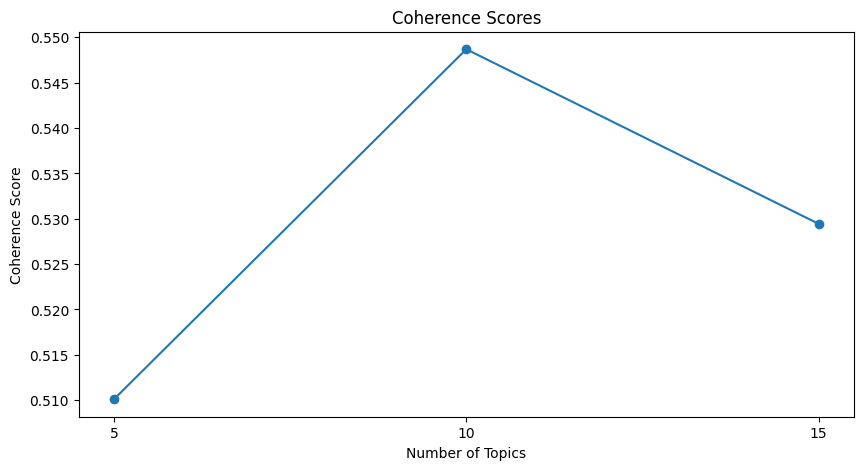

In [61]:
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

tokenized_data = cleaned_data['Comment'].apply(lambda x: x.split()).tolist()
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Function to compute coherence values for numbers of topics (5, 10, 15)
def compute_coherence_values(dictionary, corpus, texts, limit, start=5, step=5):
    model_list = []
    coherence_values = []

    for num_topics in range(start, limit + 1, step):
        model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, iterations=400, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for topics in the range of 5 to 15
model_list, coherence_values = compute_coherence_values(dictionary, corpus, tokenized_data, limit=15)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number of Topics': range(5, 16, 5),
    'Coherence Score': coherence_values
})

print(results_df)

# Plot the coherence scores
plt.figure(figsize=(10, 5))
plt.plot(results_df['Number of Topics'], results_df['Coherence Score'], marker='o')
plt.title('Coherence Scores')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(results_df['Number of Topics'])
plt.show()


In [67]:
# Training LDA with number of topics = 10
cleaned_data = pd.read_csv('/content/Comments5000.csv')
tokenized_data = cleaned_data['Comment'].apply(lambda x: x.split()).tolist()
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Trainingthe LDA model
optimal_topics = 10
final_model = LdaModel(
    corpus,
    num_topics = optimal_topics,
    id2word = dictionary,
    passes = 15,
    iterations = 400,
    alpha = 'auto'
)

# Assign each comment to its dominant topic
dominant_topics = []
for doc in corpus:
    topic_distribution = final_model.get_document_topics(doc)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    dominant_topics.append(dominant_topic)

# Count comments per topic
topic_counts = pd.Series(dominant_topics).value_counts()
total_comments = len(dominant_topics)
topic_percentages = (topic_counts / total_comments) * 100

# Prepare the output DataFrame with topics and tokens
output_rows = []
for idx in range(optimal_num_topics):
    topic_info = final_model.get_topic_terms(idx, topn=6)
    tokens = ", ".join([dictionary[id] for id, _ in topic_info])
    overall_percentage = topic_percentages.get(idx, 0)
    output_rows.append({
        'Topic': f'Topic {idx + 1}',
        'Most Relevant Tokens': tokens,
        'Overall Percentage': f"{overall_percentage:.2f}%"
    })

# Create and display output
final_output = pd.DataFrame(output_rows)
final_output.head(20)


,Topic,Most Relevant Tokens,Overall Percentage
0,Topic 1,"free, n, kejriwal, delhi, woman, seed",2.38%
1,Topic 2,"pollution, problem, year, wave, gas, hei",2.54%
2,Topic 3,"india, people, pollution, air, like, delhi",55.07%
3,Topic 4,"pollution, delhi, burning, air, cracker, farmer",12.84%
4,Topic 5,"abhi, niyu, delhi, call, running, capital",2.70%
5,Topic 6,"hai, se, ki, ke, ko, ka",13.16%
6,Topic 7,"question, company, billion, canada, energy, ev...",3.56%
7,Topic 8,"sir, question, great, greta, work, nice",3.34%
8,Topic 9,"vehicle, car, electric, public, transport, heat",2.36%
9,Topic 10,"animal, diwali, firework, day, question, culture",2.04%
